## Base de Dados IMDb

In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pickle

In [2]:
D = pickle.load(open("PreparacaoLaboratorioTexto/imdbCriticas.p", 'rb'))
Docs = D.data
y = D.target

print(len(Docs))

40000


In [3]:
tfidf = TfidfVectorizer().fit(Docs)
tokens = tfidf.get_feature_names()

print(len(tokens))

88214


In [4]:
#Docs = [doc.decode('UTF-8') for doc in Docs] #O engenheiro faz este passo para convertir a palavra em string.
                                              #No nosso caso, a palavra já vem em string.  
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z]+', ' ', doc) for doc in Docs]

Especificar minimo de ocorrências nos documentos

<b>Isto só deve ser feito após um pré-tratamento dos dados</b>

In [5]:
tfidf = TfidfVectorizer(min_df=4).fit(Docs)
tokens = tfidf.get_feature_names()

print(len(tokens))

35140


Para além do número minimo de ocorrências, também podemos especificar um padrão.

In [6]:
tfidf = TfidfVectorizer(min_df=4, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names()

print(len(tokens))

33657


## Bag of Words

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
corpus = [
"you better start swimming or you’ll sink like a stone for the times they are a-changing",
"the loser now will be later to win cause the times they are a-changing",
"it’ll soon shake your windows and rattle your walls for the times they are a-changing"]

In [9]:
cv = CountVectorizer().fit(corpus)

In [10]:
voc = cv.vocabulary_

print(len(voc))

31


Isto indica-nos que o nosso corpus possui 31 palavras diferentes

In [11]:
print(voc)

{'you': 29, 'better': 3, 'start': 18, 'swimming': 20, 'or': 13, 'll': 10, 'sink': 16, 'like': 9, 'stone': 19, 'for': 6, 'the': 21, 'times': 23, 'they': 22, 'are': 1, 'changing': 5, 'loser': 11, 'now': 12, 'will': 26, 'be': 2, 'later': 8, 'to': 24, 'win': 27, 'cause': 4, 'it': 7, 'soon': 17, 'shake': 15, 'your': 30, 'windows': 28, 'and': 0, 'rattle': 14, 'walls': 25}


Ao fazer o seu print, este não vem ordenado. <b>Não esquecer que o voc é um dicionário</b>

Para ordenar o dicionário:

In [12]:
voc = {k: v for k, v in sorted(voc.items(), key = lambda item: item[1])}

print(voc)

{'and': 0, 'are': 1, 'be': 2, 'better': 3, 'cause': 4, 'changing': 5, 'for': 6, 'it': 7, 'later': 8, 'like': 9, 'll': 10, 'loser': 11, 'now': 12, 'or': 13, 'rattle': 14, 'shake': 15, 'sink': 16, 'soon': 17, 'start': 18, 'stone': 19, 'swimming': 20, 'the': 21, 'they': 22, 'times': 23, 'to': 24, 'walls': 25, 'will': 26, 'win': 27, 'windows': 28, 'you': 29, 'your': 30}


Para dar print e aparecer de forma ordenada, sem necessitar de organizar o voc, usamos o cv.get_feature_names()

In [13]:
print(cv.get_feature_names())

['and', 'are', 'be', 'better', 'cause', 'changing', 'for', 'it', 'later', 'like', 'll', 'loser', 'now', 'or', 'rattle', 'shake', 'sink', 'soon', 'start', 'stone', 'swimming', 'the', 'they', 'times', 'to', 'walls', 'will', 'win', 'windows', 'you', 'your']


Até agora, a chave do dicionário tem sido a palavra. Se quisermos inverter isto, para que a chave seja o número e o valor a palavra, podemos usar:

In [14]:
voc2 = {value: key for key, value in voc.items()}

print(voc2)

{0: 'and', 1: 'are', 2: 'be', 3: 'better', 4: 'cause', 5: 'changing', 6: 'for', 7: 'it', 8: 'later', 9: 'like', 10: 'll', 11: 'loser', 12: 'now', 13: 'or', 14: 'rattle', 15: 'shake', 16: 'sink', 17: 'soon', 18: 'start', 19: 'stone', 20: 'swimming', 21: 'the', 22: 'they', 23: 'times', 24: 'to', 25: 'walls', 26: 'will', 27: 'win', 28: 'windows', 29: 'you', 30: 'your'}


##### Vamos agora transformar o nosso corpus

In [15]:
X = cv.transform(corpus)

print(X.getformat)

<bound method spmatrix.getformat of <3x31 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>>


Isto indicanos que possuimos uma matrix "sparse" de 3 por 31.
- 3: Número de documentos. Neste caso, frases diferentes.
- 31: Palavras encontradas nesses documentos.

Se dermos print ao corpus transformado, X, esta vai-nos apresentar quais as dimensões que estão diferentes a 0.<br>
Ou seja, quais as palavras no corpus que se encontram nessa frase (documento).

In [16]:
print(X)

  (0, 1)	1
  (0, 3)	1
  (0, 5)	1
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (0, 13)	1
  (0, 16)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 29)	2
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (1, 21)	2
  (1, 22)	1
  (1, 23)	1
  (1, 24)	1
  (1, 26)	1
  (1, 27)	1
  (2, 0)	1
  (2, 1)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 10)	1
  (2, 14)	1
  (2, 15)	1
  (2, 17)	1
  (2, 21)	1
  (2, 22)	1
  (2, 23)	1
  (2, 25)	1
  (2, 28)	1
  (2, 30)	2


Para nos ser mais fácil a visualização destas ocorrências, podemos imprimi-la como formato de array.

<b>Se existirem muitos documentos ou muitas dimensões, isto torna-se extremamente ineficiente devido à mudança de uma matriz "sparse" para um array</b>

In [17]:
print(X.toarray())

[[0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 2 0]
 [0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 2 1 1 1 0 1 1 0 0 0]
 [1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 2]]


Como foi previamente concluído, existem 3 frases (documentos) e 31 palavras.<br>
Isto traduz-se num array 3x31.

###### Analisando a primeira linha:

Como podemos observar, existem 15 dimensões diferentes de 0 e a última destas é 2.<br>
Se formos observar qual a palavra que está associada à segunda dimensão, index 1, é "are". E de facto, esta encontra-se na frase:

- you better start swimming or you’ll sink like a stone for the times they <b>are</b> a-changing

A existência do 2 significa que uma palavra do nosso dicionário, aparece duas vezes na frase.<br>
Se identificarmos qual é a palavra correspondente (index 29) concluímos que é um "you".<br>
Analisando novamente a frase:
- <b>you</b> better start swimming or <b>you</b>’ll sink like a stone for the times they are a-changing

###### Vamos agora obter o número de ocorrências de cada palavra nos documentos todos:

In [18]:
count = np.sum(X.toarray(), axis = 0)

print(count)

[1 3 1 1 1 3 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 4 3 3 1 1 1 1 1 2 2]


Podemos verificar que algumas ocorrem mais que uma vez. Neste caso, o maior número de ocorrências das palavra é 4.

Vamos imprimir isto de uma forma legível, com a devida identificação do index, palavra e do número de ocorrências:

In [19]:
for i in range(31):
    print("Index: ", i, " Palavra: ", voc2[i], " - Ocorrências: ", count[i])

Index:  0  Palavra:  and  - Ocorrências:  1
Index:  1  Palavra:  are  - Ocorrências:  3
Index:  2  Palavra:  be  - Ocorrências:  1
Index:  3  Palavra:  better  - Ocorrências:  1
Index:  4  Palavra:  cause  - Ocorrências:  1
Index:  5  Palavra:  changing  - Ocorrências:  3
Index:  6  Palavra:  for  - Ocorrências:  2
Index:  7  Palavra:  it  - Ocorrências:  1
Index:  8  Palavra:  later  - Ocorrências:  1
Index:  9  Palavra:  like  - Ocorrências:  1
Index:  10  Palavra:  ll  - Ocorrências:  2
Index:  11  Palavra:  loser  - Ocorrências:  1
Index:  12  Palavra:  now  - Ocorrências:  1
Index:  13  Palavra:  or  - Ocorrências:  1
Index:  14  Palavra:  rattle  - Ocorrências:  1
Index:  15  Palavra:  shake  - Ocorrências:  1
Index:  16  Palavra:  sink  - Ocorrências:  1
Index:  17  Palavra:  soon  - Ocorrências:  1
Index:  18  Palavra:  start  - Ocorrências:  1
Index:  19  Palavra:  stone  - Ocorrências:  1
Index:  20  Palavra:  swimming  - Ocorrências:  1
Index:  21  Palavra:  the  - Ocorrênci

Assim, podemos concluir que a palavra que ocorre mais vezes é a palavra "the", com quatro ocorrências e o seu index no vocabulário ordenado é o 21.

## Representação tf-idf

Este modelo é não-supervisionado. Portanto, este não tem atenção se a critica é positiva ou negativa, ou qual a sua pontuação.<br>
O que este modelo faz é considerar as palavras importantes:
- Palavras que aparecem muitas vezes num dado documento, mas em poucos documentos no geral. Em princípio, estas palavras serão boas caracterizadoras desse documento.
- Palavras que aparecem na maioria dos documentos, não caracterizam bem os documentos e o seu valor td-idf será baixo.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [21]:
corpus = [
"you better start swimming or you’ll sink like a stone for the times they are a-changing",
"the loser now will be later to win cause the times they are a-changing",
"it’ll soon shake your windows and rattle your walls for the times they are a-changing"]

In [22]:
cv = CountVectorizer().fit(corpus)
X = cv.transform(corpus)

Em vez do número de ocorrências, podemos normalizar os valores ao longo dos documentos.

In [23]:
tfidf = TfidfTransformer().fit(X)
X2 = tfidf.transform(X).toarray()

print(X.toarray())
print(np.round(X2, 2))

[[0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 2 0]
 [0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 2 1 1 1 0 1 1 0 0 0]
 [1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 2]]
[[0.   0.16 0.   0.27 0.   0.16 0.2  0.   0.   0.27 0.2  0.   0.   0.27
  0.   0.   0.27 0.   0.27 0.27 0.27 0.16 0.16 0.16 0.   0.   0.   0.
  0.   0.54 0.  ]
 [0.   0.18 0.3  0.   0.3  0.18 0.   0.   0.3  0.   0.   0.3  0.3  0.
  0.   0.   0.   0.   0.   0.   0.   0.36 0.18 0.18 0.3  0.   0.3  0.3
  0.   0.   0.  ]
 [0.27 0.16 0.   0.   0.   0.16 0.2  0.27 0.   0.   0.2  0.   0.   0.
  0.27 0.27 0.   0.27 0.   0.   0.   0.16 0.16 0.16 0.   0.27 0.   0.
  0.27 0.   0.54]]


Se somarmos todos os valores das colunas, ou seja, as ocorrências das palavras para cada frase (documento), podemos observar que o seu valor será 1.

In [24]:
print(np.sum(X2**2, axis=1))

[1. 1. 1.]


Em vez de usar o CountVectorizer em conjunção com o TfidfTransformer, podemos usar o TfidfVectorizer directamente

In [25]:
tfidf = TfidfVectorizer().fit(corpus)
X3 = tfidf.transform(corpus).toarray()

Se compararmos os resultados obtidos anteriormente na conjunção do CountVectorizer e TfidfTransformer com os actuais, obtidos pelo TfidfVectorizer, concluímos que são iguais

In [26]:
print(X2[:, :5])
print()
print(X3[:, :5])

[[0.         0.15841025 0.         0.26821186 0.        ]
 [0.         0.17979686 0.30442255 0.         0.30442255]
 [0.26821186 0.15841025 0.         0.         0.        ]]

[[0.         0.15841025 0.         0.26821186 0.        ]
 [0.         0.17979686 0.30442255 0.         0.30442255]
 [0.26821186 0.15841025 0.         0.         0.        ]]


## Base de Dados IMDb

In [27]:
from sklearn.datasets import load_files

In [28]:
D = load_files('PreparacaoLaboratorioTexto/aclImdb/train/')

print(D.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [29]:
X = D.data
y = D.target
fn = D.filenames

print(type(X), " ", len(X))
print(type(y), " ", len(y))
print(type(fn), " ", len(fn))

<class 'list'>   25000
<class 'numpy.ndarray'>   25000
<class 'numpy.ndarray'>   25000


- Neste caso, a variável X possui os comentários (o que chamámos de documentos).
- A variável y possui o rating da critica
- A variável fn possui os nomes dos documentos

In [30]:
print(X[0], " - ", y[0], " : ", fn[0])

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."  -  1  :  PreparacaoLaboratorioTexto/aclImdb/train/pos\11485_10.txt


Também podemos identificar o tipo de classes que o y possui.

Isto provém das sub-pastas de onde estes dados foram carregados

In [31]:
print(D.target_names)

['neg', 'pos']


### Limpeza do Texto

In [32]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [33]:
D = load_files('PreparacaoLaboratorioTexto/aclImdb/train/')
Docs = D.data
y = D.target
fNames = D.filenames

In [34]:
tfidf = TfidfVectorizer().fit(Docs)
tokens = tfidf.get_feature_names()

In [35]:
print(len(tokens))
print(tokens[:50])

74849
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']


In [36]:
print(Docs[0])

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."


Como podemos observar, se apenas fizermos isto, ficamos com cerca de 75000 dimensões. Isto vai-se revelar extremamente problemático.<br>

Vamos então tratar de limpar os dados para os puder analisar depois.
- O texto vem em string binária, logo temos de <b>converter para strings válidas</b>.
- Também existem caracteres de mudança de linha em HTML que têm de ser <b>removidos</b>.
- Existem caracteres que não são "palavras" consideradas válidas. Devemos <b>remover o que não pertence à expressão passada</b>.
    - 'a-zA-Z' inclui todos os caracteres "normais". A seguinte parte da expressão significa que inclui os caracteres 192 até ao 255. Estes são os acentos.

In [37]:
Docs = [doc.decode('UTF-8') for doc in Docs]
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

Agora podemos inspeccionar o resultado destas operações.

In [38]:
print(Docs[0])

Zero Day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty 


Com estas operações, o número de dimensões foi, mas muito pouco reduzido. Assim, finalizamos a limpeza do texto.

Ao usar o tfidfVectorizer, podemos passar alguns parametros que vão diminuir imenso o número de dimensões (palavras) a ter em conta na análise dos documentos.
- min_df: Este parametro específica o número mínimo de ocorrências necessárias, nos documentos todos, para essa palavra ser incluída como dimensão.
- token-pattern: Este recebe uma string em formato padrão. \b significa backspace, \w significa caracter e + significa que o "símbolo" anterior pode aparecer mais vezes.
    - Abaixo, estamos a especificar que o só serão incluídas palavras que tenham um espaço antes e depois dos caracteres, e tem de ter no mínimo 3 caracteres.

In [39]:
tfidf = TfidfVectorizer(min_df = 3, token_pattern = r'\b\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names()

In [40]:
print(len(tokens))
print(tokens[:50])

35122
['aaa', 'aaargh', 'aag', 'aage', 'aames', 'aamir', 'aankhen', 'aapke', 'aardman', 'aargh', 'aaron', 'aatish', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby', 'abc', 'abduct', 'abducted', 'abducting', 'abduction', 'abductor', 'abdul', 'abe', 'abel', 'abercrombie', 'aberration', 'abetted', 'abhay', 'abhishek', 'abhorrence', 'abhorrent', 'abide', 'abiding', 'abigail', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably', 'abnormal']


### Stemmers

In [41]:
from nltk.stem import PorterStemmer

In [42]:
stemFunc = PorterStemmer()
voc = tfidf.get_feature_names()
print(len(voc))
print(voc[:50])

35122
['aaa', 'aaargh', 'aag', 'aage', 'aames', 'aamir', 'aankhen', 'aapke', 'aardman', 'aargh', 'aaron', 'aatish', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby', 'abc', 'abduct', 'abducted', 'abducting', 'abduction', 'abductor', 'abdul', 'abe', 'abel', 'abercrombie', 'aberration', 'abetted', 'abhay', 'abhishek', 'abhorrence', 'abhorrent', 'abide', 'abiding', 'abigail', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably', 'abnormal']


Neste vocabulário, podemos identificar várias palavras muito parecidas que possuem significados muito semelhantes.<br>
"abandoned", "abandoning", "abandonment", "abandons".

Ao usar o Stemmer, podemos converter todas estas palavras para um única palavra "raiz".

In [43]:
voc2 = [stemFunc.stem(w) for w in voc]

print(len(np.unique(voc2)))
print(voc2[:50])

22470
['aaa', 'aaargh', 'aag', 'aag', 'aam', 'aamir', 'aankhen', 'aapk', 'aardman', 'aargh', 'aaron', 'aatish', 'aback', 'abandon', 'abandon', 'abandon', 'abandon', 'abandon', 'abba', 'abbey', 'abbot', 'abbott', 'abbrevi', 'abbi', 'abc', 'abduct', 'abduct', 'abduct', 'abduct', 'abductor', 'abdul', 'abe', 'abel', 'abercrombi', 'aberr', 'abet', 'abhay', 'abhishek', 'abhorr', 'abhorr', 'abid', 'abid', 'abigail', 'abil', 'abil', 'abject', 'ablaz', 'abl', 'abli', 'abnorm']


Observamos que as palavras previamente distintas são substituídas por "abandon". Esta é a palavra "raiz" de todas elas.<br>
Também podemos ver a redução de 12000 dimensões.

Mas, mesmo fazendo isto, a dimensão no vocabulário manteve-se. Abordaremos isto mais à frente.<br>
Vamos fazer o stem para cada documento.

Começamos por usar o método "split" das strings que converte todas as palavras nessa string numa lista.

In [44]:
doc = Docs[0]
dd = doc.split()

print(dd)

['Zero', 'Day', 'leads', 'you', 'to', 'think', 'even', 're', 'think', 'why', 'two', 'boys', 'young', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'It', 'captures', 'what', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'two', 'humans', 'who', 'have', 'decided', 'to', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'to', 'define', 'their', 'own', 'mutual', 'world', 'via', 'coupled', 'destruction', 'It', 'is', 'not', 'a', 'perfect', 'movie', 'but', 'given', 'what', 'money', 'time', 'the', 'filmmaker', 'and', 'actors', 'had', 'it', 'is', 'a', 'remarkable', 'product', 'In', 'terms', 'of', 'explaining', 'the', 'motives', 'and', 'actions', 'of', 'the', 'two', 'young', 'suicide', 'murderers', 'it', 'is', 'better', 'than', 'Elephant', 'in', 'terms', 'of', 'being', 'a', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin', 'it', 'is', 'a', 'far', 'far', 'better', 'film', 'than

O método contrário a este é o "join". Este converte um array numa string.

Se meteremos um espaço, ' ', seguido do .join definimos que o que se vai encontrar entre cada termo é um espaço.

In [45]:
' '.join(dd)

'Zero Day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty'

Apresentado isto, a metodologia para o uso do stem para os documentos é:
- Separar a string para uma lista
- Passar essa lista pelo stemmer
- Unir a lista para uma string

In [46]:
doc2 = ' '.join([stemFunc.stem(w) for w in doc.split()])

print("Original: ")
print(doc)
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Após Stem: ")
print(doc2)

Original: 
Zero Day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty 

//-----------------//-----------------//-----------------//

Após Stem: 
zero day lead you to think even re think whi two boy young men would do what they did commit mutual suicid via slaughter their classmat it captur what must be beyond a bizarr mode of be for

Comparando os textos percebemos que certas palavras são simplificadas para as suas raízes. Pegando na primeira linha:

"zero day <b>lead</b> you to think even re think <b>whi</b> two boy young men would do what they did commit mutual <b>suicid</b> via <b>slaughter</b> their"

Esta é a ideia geral do que vai acontecer a cada documento ao passar pelo Stemmer. <br>
Vamos fazer isto para todos os documentos e passá-lo, seguidamente, pelo TfidfVectorizer com os parametros vistos anteriormente.

No próximo exemplo, vamos fazer tudo de novo, realmente representando o processo completo.

In [47]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import PorterStemmer

D = load_files('PreparacaoLaboratorioTexto/aclImdb/train/')
Docs = D.data
y = D.target
fNames = D.filenames

Docs = [doc.decode('UTF-8') for doc in Docs]
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

stemFunc = PorterStemmer()
Docs2 =[' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]

tfidf = TfidfVectorizer(min_df = 3, token_pattern = r'\b\w\w\w+\b').fit(Docs2)
tokens = tfidf.get_feature_names()

print(len(tokens))

23220


Inicialmente, os nossos dados possuiam 74849 e, após a limpeza do texto e a sua representação TfidfVectorizer, obtemos 23220.<br>
Isto significa que removemos 51629 palavras (dimensões).

Vamos agora observar para os outros dois tipos de Stemmer: SnowballStemmer e LancasterStemmer.

<b>No vídeo parte 6, 23:32 o engenheiro diz que o modelo tf-idf não é usado nos ficheiros de teste. Questionar!</b>

In [48]:
from nltk.stem import SnowballStemmer

stemFunc = SnowballStemmer(language='english')
Docs2 =[' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]

tfidf2 = TfidfVectorizer(min_df = 3, token_pattern = r'\b\w\w\w+\b').fit(Docs2)
tokens = tfidf2.get_feature_names()

print(len(tokens))

22874


In [49]:
from nltk.stem import LancasterStemmer

stemFunc = LancasterStemmer()
Docs2 =[' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]

tfidf3 = TfidfVectorizer(min_df = 3, token_pattern = r'\b\w\w\w+\b').fit(Docs2)
tokens = tfidf3.get_feature_names()

print(len(tokens))

18959


Podemos observar que houve cerca de 500 palavras removidas do PorterStemmer para o SnowballStemmer. Mas a grande diferença está no Lancaster Stemmer, com um redução de 4000 palavras. Isto porque o LancasterStemmer é mais estrito.
Vamos observar as primeiras 50 amostras de cada um dos Stemmers e compará-los

In [50]:
print("PorterStemmer:")
print(tfidf.get_feature_names()[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("SnowballStemmer:")
print(tfidf2.get_feature_names()[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("LancasterStemmer:")
print(tfidf3.get_feature_names()[:50])

PorterStemmer:
['aaa', 'aaargh', 'aag', 'aam', 'aamir', 'aankhen', 'aapk', 'aardman', 'aargh', 'aaron', 'aatish', 'aback', 'abandon', 'abba', 'abbey', 'abbi', 'abbot', 'abbott', 'abbrevi', 'abc', 'abdic', 'abduct', 'abductor', 'abdul', 'abe', 'abel', 'abercrombi', 'aberr', 'abet', 'abhay', 'abhishek', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abject', 'abl', 'ablaz', 'abli', 'abnorm', 'abo', 'aboard', 'abod', 'abolish', 'abolit', 'abomin', 'aborigin', 'abort', 'abortionist']

//-----------------//-----------------//-----------------//

SnowballStemmer:
['aaa', 'aaargh', 'aag', 'aam', 'aamir', 'aankhen', 'aapk', 'aardman', 'aargh', 'aaron', 'aatish', 'aback', 'abandon', 'abba', 'abbey', 'abbi', 'abbot', 'abbott', 'abbrevi', 'abc', 'abdic', 'abduct', 'abductor', 'abdul', 'abe', 'abel', 'abercrombi', 'aberr', 'abet', 'abhay', 'abhishek', 'abhor', 'abhorr', 'abid', 'abigail', 'abil', 'abject', 'abl', 'ablaz', 'abli', 'abnorm', 'abo', 'aboard', 'abod', 'abolish', 'abolit', 'abomin', 'a

Logo na primeira entrada, podemos ver que tanto no PorterStemmer como no SnowballStemmer são iguais, mas no Lancaster já não. A primeira entrada no Lancaster, é a segunda entrada dos outros dois.

Isto é um claro caso que o Lancaster descartu "aaa" como uma palavra importante para a análise do texto.

<b>Conselho do Engenheiro: </b>

Quando estamos a lidar com textos, como estes processos não são imediatos, devemos diferir os três stemmers (tfidf, tfidf2, tfidf3) e guardar estas representações num ficheiro pickle. Assim, já possuimos um modelo Bag of Words treinado e não é preciso passar pelo processo todo novamente.<br>
Também se pode guardar os documentos após o processo stemming, dado que este também não é imediato.

### Representação tf-idf após Stemming

Para esta secção estamos a usar o Docs2 que foi passado pelo LancasterStemmer

In [51]:
X = tfidf3.transform(Docs2)
tokens3 = tfidf3.get_feature_names()

print(X.shape, type(X))

(25000, 18959) <class 'scipy.sparse.csr.csr_matrix'>


Temos 25000 documentos e 18959 dimensões, ou seja, palavras importantes.

Vamos agora obter os valores, ordenados de forma decrescente, de cada uma destas palavras, em todos os documentos.

In [52]:
xM = np.max(X, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc3 = [tokens3[i] for i in idx]

print("Palavras mais Importantes:")
print(voc3[:100])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Palavras menos Importantes:")
print(voc3[-100:])

Palavras mais Importantes:
['pokemon', 'dalm', 'libr', 'doodlebop', 'smallvil', 'scan', 'lupin', 'woo', 'sasquatch', 'wei', 'stev', 'darkm', 'colombo', 'zatoich', 'botch', 'demon', 'rap', 'muppet', 'bye', 'columbo', 'kibbutz', 'rajn', 'gadget', 'lennon', 'dari', 'ranm', 'naschy', 'melt', 'surf', 'seag', 'blah', 'dahm', 'grun', 'beetl', 'winfield', 'cyph', 'hackenstein', 'django', 'creasy', 'puppet', 'joan', 'othello', 'worm', 'gundam', 'noriko', 'suck', 'bird', 'camp', 'hanzo', 'zizek', 'dracul', 'hallam', 'scarecrow', 'zack', 'serb', 'gaur', 'genov', 'woody', 'gamer', 'pau', 'zomb', 'beatl', 'bruc', 'biko', 'keaton', 'alvin', 'cavem', 'leonor', 'oprah', 'khour', 'brend', 'pie', 'chib', 'elvir', 'solino', 'gandh', 'tan', 'rees', 'mordrid', 'gujarat', 'mindy', 'anny', 'karloff', 'montand', 'pia', 'lundgr', 'dent', 'menc', 'edy', 'gershon', 'indones', 'cognac', 'batm', 'modesty', 'kyl', 'tobacco', 'cordel', 'sarno', 'sandr', 'melind']

//-----------------//-----------------//------------

Algumas destas palavras estão cortadas pelo stem e podem não fazer muito sentido. Podemos comparar ao que eram, caso apareçam, se não tivesse sido feito o stem.

Para este caso, no TfidfVectorizer, o parametero "min_df" é 5 e o "token_pattern" aceita palavras com 4 caracteres no mínimo.

In [53]:
Docs = D.data
Docs = [doc.decode('UTF-8') for doc in Docs]
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

tfidf = TfidfVectorizer(min_df = 5, token_pattern = r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names()

X = tfidf.transform(Docs)
xM = np.max(X, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

print("Palavras mais Importantes:")
print(voc[:100])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Palavras menos Importantes:")
print(voc[-100:])

Palavras mais Importantes:
['pokemon', 'scanners', 'steve', 'doodlebops', 'demons', 'casper', 'sasquatch', 'smallville', 'darkman', 'xica', 'weller', 'sucks', 'zatoichi', 'lennon', 'botched', 'gadget', 'worms', 'cypher', 'naschy', 'ants', 'janeane', 'blah', 'priya', 'muppet', 'joan', 'tanner', 'lexi', 'hackenstein', 'othello', 'seagal', 'gamera', 'zizek', 'alvin', 'brendan', 'khouri', 'pack', 'beatles', 'ranma', 'chiba', 'darius', 'wrestlemania', 'flea', 'karloff', 'dentist', 'gruner', 'paulie', 'hanzo', 'oprah', 'elvira', 'montand', 'bruce', 'zombi', 'keaton', 'camp', 'winfield', 'dahmer', 'coop', 'django', 'stefan', 'columbo', 'sissy', 'beetle', 'blob', 'sandra', 'batman', 'azumi', 'britney', 'gershon', 'hulk', 'macarthur', 'reese', 'kusturica', 'kornbluth', 'ichi', 'annie', 'zack', 'pusser', 'gundam', 'mordrid', 'dracula', 'mary', 'mindy', 'dillinger', 'jill', 'librarians', 'danish', 'scarecrows', 'biko', 'nerd', 'program', 'lundgren', 'edie', 'chen', 'shearer', 'moto', 'sniper', 's

Também podemos obter as palavras que aparecem mais vezes ao longo de todos os documentos, a partir do idf.

In [54]:
idf = tfidf.idf_
idx = np.argsort(idf)
voc = [tokens[i] for i in idx]
print(voc[:100])

['this', 'that', 'with', 'movie', 'have', 'film', 'from', 'like', 'they', 'there', 'just', 'about', 'what', 'some', 'good', 'more', 'when', 'time', 'very', 'even', 'only', 'would', 'really', 'story', 'which', 'well', 'than', 'much', 'their', 'were', 'other', 'been', 'most', 'also', 'into', 'first', 'made', 'great', 'because', 'will', 'people', 'make', 'could', 'after', 'then', 'them', 'watch', 'think', 'acting', 'movies', 'seen', 'characters', 'many', 'plot', 'being', 'never', 'best', 'little', 'character', 'ever', 'know', 'where', 'over', 'better', 'life', 'films', 'does', 'love', 'still', 'here', 'your', 'these', 'while', 'should', 'something', 'such', 'through', 'back', 'scenes', 'watching', 'scene', 'those', 'thing', 'real', 'years', 'doesn', 'actors', 'another', 'before', 'though', 'director', 'makes', 'work', 'didn', 'look', 'actually', 'nothing', 'find', 'going', 'show']


Como podemos observar, estas palavras são neutras a criticas positivas ou negativas, pois são palavras para construir frases "normais". Não existe nenhuma palavra que seja importante para a distinção entre os ratings.

## Análise dos Coeficientes dum Discriminante Logístico

In [55]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import SnowballStemmer

In [56]:
D = load_files('PreparacaoLaboratorioTexto/aclImdb/train/')
Docs1 = D.data
y1 = D.target

D = load_files('PreparacaoLaboratorioTexto/aclImdb/test/')
Docs2 = D.data
y2 = D.target

Docs1 = [doc.decode('UTF-8') for doc in Docs1]
Docs1 = [doc.replace('<br />', ' ') for doc in Docs1]
Docs1 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs1]

tfidf = TfidfVectorizer(min_df = 5, token_pattern = r'\b\w\w\w\w+\b').fit(Docs1)
X1 = tfidf.transform(Docs)

Docs2 = [doc.decode('UTF-8') for doc in Docs2]
Docs2 = [doc.replace('<br />', ' ') for doc in Docs2]
Docs2 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]

X2 = tfidf.transform(Docs2)

xM = np.max(X, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

A razão para não fazermos stem neste caso, é apenas para podermos ter uma melhor ideia das palavras são classificadas como positivas e negativas, sem estarem reduzidas.

Vamos proceder ao processo de classificação.

In [57]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty = 'l2', max_iter = 1000, C = 10, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

0.98516
0.87088


Como podemos observar, apesar dos resultados não serem maus (cerca de 87% de acertos no teste), existe uma descrepância entre os valores de acertos no treino e no teste.

Vamos aumentar o factor de regularização, C. <b>Não esquecer que este valor é inversamente proporcional ao lambda das fórmulas do Ridge e do Lasso</b>.

In [58]:
dl = LogisticRegression(penalty = 'l2', max_iter = 1000, C = 1, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

0.93248
0.87968


Assim reduzimos a diferença de resultados entre os valores de treino e do teste.

Vamos observar os coeficientes, w.

In [59]:
w = dl.coef_
idx = np.argsort(w).squeeze()

voc = tfidf.get_feature_names()
voc2 = [voc[i] for i in idx]

print("Pesos com menor valor:")
print(voc[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Pesos com maior valor:")
print(voc[-50:])

Pesos com menor valor:
['aames', 'aamir', 'aankhen', 'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby', 'abduct', 'abducted', 'abduction', 'abel', 'abetted', 'abhay', 'abhishek', 'abhorrent', 'abiding', 'abigail', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'aboard', 'abode', 'abominable', 'abomination', 'abominations', 'aboriginal', 'aborigine', 'aborigines', 'aborted', 'abortion', 'abortions', 'abound', 'abounds', 'about', 'above', 'abraham', 'abrahams']

//-----------------//-----------------//-----------------//

Pesos com maior valor:
['zeenat', 'zeffirelli', 'zeitgeist', 'zelah', 'zelda', 'zemeckis', 'zenda', 'zenith', 'zentropa', 'zero', 'zest', 'zesty', 'zeta', 'zeus', 'zhang', 'zhivago', 'zhou', 'ziegfeld', 'ziering', 'ziggy', 'zilch', 'zillion', 'zimmer', 'zing', 'zion', 'zippy', 'ziyi', 'zizek', 'zodiac', 'zombi', 'zombie', 'zombies', 'zombified', 'zomcom'

Concluimos que os primeiros 50 valores têm conotação negativa.<br>
Os últimos 50 valores têm conotação positiva.

Para ver quantas dimensões existem após a operação de representação do TfidfVectorizer, basta sabermos o shape do w.

In [60]:
print(w.shape)

(1, 25871)


Como vimos várias vezes anteriormente, existem mais de 25000 dimensões, ou seja, palavras que têm significado na classificação das críticas.

Como as passamos por um discriminante com regularização L2, Ridge, algumas destas foram convertidas para valores muito próximos de 0, ou seja, tiverem muito pouca influência na classificação das criticas.

120


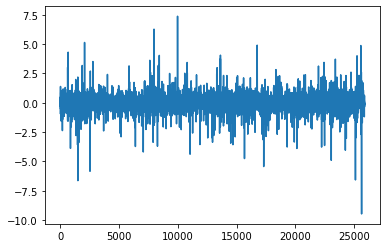

In [61]:
w = w.squeeze()

plt.plot(w)

print(np.sum(np.abs(w) <= 1e-3))

Apenas 120 pesos têm um valor muito próximo de 0.<br>
Pelo plot, podemos ver que existe alguns pesos que se destacam tanto para valores muito altos, como um perto de 7.5, outro acima de 5. Mas também temos os valores muito baixos como um próximo de -10, e outro perto de -7.5.

Vamos treinar o nosso determinante logístico, mas desta vez com a regularização L1, Lasso.

In [62]:
dl = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000, C = 1, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

0.89848
0.87284


Comparando ao Ridge, temos um score ligeiramente mais reduzido, assim como a descrepância entre eles.

No Lasso, as dimensões não são convertidas para valores próximos de 0, mas sim de 0. Vamos ver quantas dimensões foram tidas em conta para este discrimante.

In [63]:
w = dl.coef_
w = w.squeeze()

print(np.sum(w != 0))

1096


Surpreendentemente, apenas 1097 dimensões foram tidas em conta para treinar este modelo.

Vamos observar as palavras que discriminam entre uma critica negativa e uma positiva.

In [64]:
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2 = [voc[i] for i in idx]

print("Pesos com menor valor:")
print(voc2[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Pesos com maior valor:")
print(voc2[-50:])

Pesos com menor valor:
['worst', 'waste', 'awful', 'poorly', 'disappointment', 'boring', 'fails', 'dull', 'worse', 'pointless', 'horrible', 'mess', 'poor', 'disappointing', 'lacks', 'terrible', 'unfunny', 'avoid', 'laughable', 'annoying', 'badly', 'unfortunately', 'ridiculous', 'forgettable', 'nothing', 'save', 'redeeming', 'lame', 'wooden', 'supposed', 'unless', 'instead', 'lousy', 'script', 'mediocre', 'mildly', 'pathetic', 'weak', 'dreadful', 'wonder', 'basically', 'insult', 'baldwin', 'stupid', 'obnoxious', 'tedious', 'incoherent', 'uninteresting', 'predictable', 'minutes']

//-----------------//-----------------//-----------------//

Pesos com maior valor:
['atmosphere', 'captures', 'surprised', 'heart', 'powerful', 'fascinating', 'world', 'also', 'delightful', 'simple', 'enjoy', 'outstanding', 'still', 'masterpiece', 'unique', 'hilarious', 'love', 'entertaining', 'liked', 'surprisingly', 'moving', 'well', 'beautiful', 'touching', 'funniest', 'finest', 'beautifully', 'incredible',

Se aumentássemos o valor de C, o que concluiriamos seria que a descrepância no resultado entre treino e o teste seria muito maior, e o resultado do treino também seria melhor. Mas como visto previamente, isto não significa que o nosso modelo é melhor.

Por outro lado, se diminuíssemos este valor, a descrepância seria menor, assim como ambos os resultados.

### N-gramas

N-gramas são dimensões que em vem de possuirem uma única palavra, possuem n palavras.<br>
Isto pode ser vantajoso embora seja dispendioso.

In [65]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [66]:
D = load_files('PreparacaoLaboratorioTexto/aclImdb/train/')
Docs1 = D.data
y1 = D.target

D = load_files('PreparacaoLaboratorioTexto/aclImdb/test/')
Docs2 = D.data
y2 = D.target

Docs1 = [doc.decode('UTF-8') for doc in Docs1]
Docs1 = [doc.replace('<br />', ' ') for doc in Docs1]
Docs1 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs1]

tfidf = TfidfVectorizer(min_df = 5, ngram_range = (1, 2), token_pattern = r'\b\w\w\w+\b').fit(Docs1)
X1 = tfidf.transform(Docs)

Docs2 = [doc.decode('UTF-8') for doc in Docs2]
Docs2 = [doc.replace('<br />', ' ') for doc in Docs2]
Docs2 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]

X2 = tfidf.transform(Docs2)

print(X1.shape[1])

137344


Com n-gramas de uma palavra e duas palavras, o nosso dicionário aumenta de forma exponencial, como podemos observar.<br>
Todo o processo foi muito mais demorado.

Novamente, a razão de não existir stemming, é para conseguir perceber melhor que palavras são tidas em contas no modelo.

Vamos observar as palavras mais importantes:

In [67]:
xM = np.max(X1, axis = 0).toarray().squeeze()
idx = np.argsort(-xM)
tokens = tfidf.get_feature_names()
voc = [tokens[i] for i in idx]
print(voc[:100])

['scanners', 'pokemon', 'wei', 'dev', 'casper', 'more more', 'woo', 'botched', 'xica', 'hackenstein', 'steve', 'zizek', 'darkman', 'khouri', 'demons', 'zatoichi', 'gadget', 'lennon', 'smallville', 'tanner', 'othello', 'shearer', 'naschy', 'sasquatch', 'darius', 'coop', 'beetle', 'gamera', 'weller', 'stefan', 'seagal', 'joan', 'cypher', 'ants', 'soha', 'alvin', 'librarians', 'dahmer', 'chiba', 'paulie', 'kyle', 'kriemhild', 'janeane', 'biko', 'winfield', 'che', 'jill', 'basket', 'worms', 'muppet', 'puppet master', 'macarthur', 'foo', 'pack', 'timon', 'kusturica', 'brendan', 'creasy', 'ranma', 'django', 'kornbluth', 'dillinger', 'kolchak', 'dominick', 'hanzo', 'zack', 'elvira', 'blank check', 'lincoln', 'gruner', 'zombi', 'the doodlebops', 'karloff', 'ripley', 'oprah', 'raj', 'bruce', 'azumi', 'wrestlemania', 'lassie', 'pierce', 'homer', 'doodlebops', 'ichi', 'sucks', 'tobacco', 'luzhin', 'modesty', 'lexi', 'jigsaw', 'morty', 'mindy', 'europa', 'moto', 'dressler', 'gypo', 'mathieu', 'lun

Também podemos saber quantos uni-gramas existem, assim como bi-gramas:

In [68]:
wC = np.array([len(w.split()) for w in voc])

print("Número de Uni-gramas: ", np.sum(wC == 1))
print("Número de Bi-gramas: ", np.sum(wC == 2))

Número de Uni-gramas:  26718
Número de Bi-gramas:  110626


Como podemos observar, o número de bi-gramas no nosso vocabulário é muito maior que o número de uni-gramas.<br>
Se aumentássemos o número máximo na gama de n-gramas, este número seria cada vez maior.

Vamos agora classificar as críticas com o nosso discriminante logístico.

In [ ]:
dl = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000, C = 0.10, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()

print(np.sum(w != 0))

0.77824
0.78084
56


Neste caso, a nossa regularização é muito forte, C = 0.10.<br>
O número de pesos que tiveram influência foram 57 das iniciais 137344. Isto é uma redução muito severa, especialmente quando anteriormente conseguimos taxas de acerto a rondar os 90% e agora temos a rondar os 78%.

Vamos olhar para os n-gramas que tiveram mais influência para classificar as criticas, tanto para as negativas como para as positivas.

In [ ]:
voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2 = [voc[i] for i in idx]

print("Pesos com menor valor:")
print(voc2[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Pesos com maior valor:")
print(voc2[-50:])

Pesos com menor valor:
['worst', 'bad', 'waste', 'awful', 'boring', 'nothing', 'poor', 'terrible', 'even', 'just', 'minutes', 'plot', 'stupid', 'script', 'there', 'they', 'why', 'any', 'worse', 'only', 'was', 'horrible', 'this', 'would', 'make', 'movie', 'money', 'supposed', 'not', 'have', 'could', 'off', 'instead', 'thing', 'then', 'have been', 'remembered for', 'remembered one', 'remembered and', 'aaa', 'remember which', 'remember you', 'remember with', 'remember why', 'remember who', 'remembered seeing', 'remember where', 'remember when', 'remember what', 'remember well']

//-----------------//-----------------//-----------------//

Pesos com maior valor:
['games but', 'gandhi the', 'games are', 'game you', 'gandolfini', 'gangs new', 'gangs and', 'gangs', 'game when', 'gangly', 'gangland', 'gang who', 'gang thugs', 'gang the', 'gandhi was', 'gang that', 'game where', 'gang rape', 'gang members', 'gang leader', 'game which', 'gang are', 'gang and', 'game with', 'gang all', 'gang', 'g

Vamos agora alterar o valor da regularização e repetir este processo.

In [ ]:
dl = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000, C = 1, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()

print(np.sum(w != 0))

voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2 = [voc[i] for i in idx]

print("Pesos com menor valor:")
print(voc2[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Pesos com maior valor:")
print(voc2[-50:])

0.8882
0.87972
717
Pesos com menor valor:
['worst', 'waste', 'awful', 'poorly', 'boring', 'bad', 'dull', 'poor', 'disappointment', 'fails', 'horrible', 'worse', 'annoying', 'mess', 'disappointing', 'terrible', 'unfortunately', 'not worth', 'pointless', 'lacks', 'laughable', 'nothing', 'avoid', 'ridiculous', 'badly', 'save', 'lame', 'supposed', 'unfunny', 'script', 'stupid', 'redeeming', 'instead', 'pathetic', 'forgettable', 'minutes', 'unless', 'crap', 'than this', 'not even', 'way too', 'predictable', 'basically', 'wooden', 'wasted', 'wonder', 'looks', 'attempt', 'not very', 'weak']

//-----------------//-----------------//-----------------//

Pesos com maior valor:
['especially', 'moving', 'seen', 'hilarious', 'world', 'job', 'surprised', 'enjoy', 'also', 'entertaining', 'both', 'still', 'better than', 'beautifully', 'well', 'love', 'gem', 'touching', 'the best', 'incredible', 'bit', 'liked', 'simple', 'this great', 'funniest', 'beautiful', 'perfectly', 'noir', 'definitely', 'enjoyed

Com C = 1 conseguimos um melhor resultado, não só em termos da reduzida descrepância como em termos de resultados. 88%.<br>
Também observamos que as dimensões tidas em conta foram 713.

Vamos tentar com o C = 10.

In [ ]:
dl = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000, C = 10, tol = 1e-3)
dl.fit(X1, y1)

print(dl.score(X1, y1))
print(dl.score(X2, y2))

w = dl.coef_
w = w.squeeze()

print(np.sum(w != 0))

voc = tfidf.get_feature_names()
idx = np.argsort(w)
voc2 = [voc[i] for i in idx]

print("Pesos com menor valor:")
print(voc2[:50])
print()
print("//-----------------//-----------------//-----------------//")
print()
print("Pesos com maior valor:")
print(voc2[-50:])

0.99756
0.88508
6547
Pesos com menor valor:
['waste', 'not worth', 'worst', 'awful', 'disappointment', 'poorly', 'forgettable', 'laughable', 'lacks', 'boring', 'mess', 'the introduction', 'worse', 'unfunny', 'horrible', 'fails', 'lousy', 'avoid', 'blue and', 'not recommend', 'poor', 'alright', 'only good', 'disappointing', 'baldwin', 'annoying', 'badly', 'obnoxious', 'great loved', 'unlikeable', 'pointless', 'save', 'let down', 'basically', 'bad', 'very disappointed', 'had high', 'dull', 'not recommended', 'fast forward', 'might enjoy', 'the excellent', 'unwatchable', 'unconvincing', 'pretentious', 'unfortunately', 'wooden', 'ridiculous', 'wanted like', 'skip this']

//-----------------//-----------------//-----------------//

Pesos com maior valor:
['finest', 'can wait', 'gem', 'chilling', 'better than', 'predictable but', 'recommended', 'may not', 'underrated', 'endearingly', 'atmosphere', 'love this', 'perfectly', 'highly recommend', 'better but', 'subtle', 'today', 'likable and', '

Para este caso, a descrepância é muito elevada, cerca de 11%. O resultado dos dados de treino é muito perto de 100%, isto é um indicador de sobreaprendizagem.<br>
Também podemos observar que a regularização foi menos severa e estrita que anteriormente. Temos 6792 dimensões a serem tidas em conta.